#### Importing libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, xls file I/O (e.g. pd.read_excel)
import re # regular expression

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Making blobs & K-Means
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Loading dataset

In [ ]:
#!pip install openpyxl

In [ ]:
def load(): 
    df = pd.read_excel('/content/drive/MyDrive/Datasets/Producer_Grading.xlsx')
    return df

df = load()
df.head()

,NW Producer,Active Agy,Agy Code,MKTG Manager,Large UW,Agy Name,Agy City,Agy State,Production Source,Inforce #,...,Renew QTD WP,Renew BND WP,RRR (WP),New BND WP,Prior New BND WP,YoY New WP,3-Pol YR EP,3-Pol YR Incurred L&LAE,3 YR Loss Ratio,3 YR Loss Ratio Rel
0,ABD INSURANCE,Yes,CAH07857,Depika Narewatt,Paul Sasaki,"ABD INSURANCE AND FINANCIAL SERVICES, INC.",San Mateo,CA,Retailer,27.0,...,3971517.0,3134861.0,0.789336,3725186.0,101643.0,4.807827,8.821422e+06,1669578.00,0.189264,0.437068
1,ACK Holdings LLC,No,AZH06748,Tim OConnor,Tiffany Banzon,STRATEGIC RISK SOLUTIONS GROUP,Paradise Valley,AZ,Retailer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.400360e+05,241421.97,0.447048,1.032369
2,"Acrisure, LLC",Yes,AKH00247,Erica Barlow,Kilby Hammond,RISQ CONSULTING,Anchorage,AK,Retailer,19.0,...,1174593.0,610966.0,0.520151,610966.0,7559.0,-1.000000,3.871166e+06,1692937.65,0.437320,1.009904
3,"Acrisure, LLC",Yes,AKH01123,Erica Barlow,Kilby Hammond,RISQ CONSULTING,Fairbanks,AK,Retailer,2.0,...,49417.0,49417.0,1.000000,49417.0,NaN,NaN,2.193366e+05,215853.25,0.984119,2.272629
4,"Acrisure, LLC",No,ARH05712,Eric Rose,Brad Grimmett,THE HATCHER AGENCY,Little Rock,AR,Retailer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.00,NaN,NaN


#### Checking shape : Total number of rows and columns

In [ ]:
# Since last 3 rows has totals, textual details. Removing it

In [ ]:
def check_shape(df):
    df.drop(df.tail(3).index,inplace = True)
    dfs = df.shape
    return dfs

check_shape(df)

(1237, 38)

#### Checking datatypes

In [ ]:
def check_dtype(df):
    dfi = df.info()
    return dfi

check_dtype(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1237 entries, 0 to 1236
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   NW Producer              1235 non-null   object 
 1   Active Agy               1237 non-null   object 
 2   Agy Code                 1237 non-null   object 
 3   MKTG Manager             1231 non-null   object 
 4   Large UW                 1225 non-null   object 
 5   Agy Name                 1237 non-null   object 
 6   Agy City                 1237 non-null   object 
 7   Agy State                1237 non-null   object 
 8   Production Source        1237 non-null   object 
 9   Inforce #                674 non-null    float64
 10  Inforce WP               674 non-null    float64
 11  Prior Inforce #          706 non-null    float64
 12  Prior Inforce WP         706 non-null    float64
 13  YoY Inforce WP           706 non-null    float64
 14  New Sub                 

#### Checking duplicates

In [ ]:
def check_duplicates(df):
    dfd = df[df.duplicated()]
    dfdn = dfd.shape
    return dfdn

check_duplicates(df)

(0, 38)

#### Checking Null values

In [ ]:
def check_null_val(df):
    dfnv = df.isna().sum()
    return dfnv
    
check_null_val(df)

NW Producer                  2
Active Agy                   0
Agy Code                     0
MKTG Manager                 6
Large UW                    12
Agy Name                     0
Agy City                     0
Agy State                    0
Production Source            0
Inforce #                  563
Inforce WP                 563
Prior Inforce #            531
Prior Inforce WP           531
YoY Inforce WP             531
New Sub                    260
New QTD                    399
Quote Rate                 531
Prior New Sub              248
Prior New QTD              493
Prior Quote Rate           493
YoY: New Sub               384
New BND                    920
Hit Rate                   920
Prior New BND              528
Prior Hit Rate             880
Renew QTD                  554
Renew BND                  586
RRR (#)                    586
Renew QTD WP               554
Renew BND WP               586
RRR (WP)                   586
New BND WP                 554
Prior Ne

#### Percentage of Null values

In [ ]:
def check_null_per(df):
    dfnp = df.isnull().sum() * 100 / len(df)
    return dfnp

check_null_per(df)

NW Producer                 0.161681
Active Agy                  0.000000
Agy Code                    0.000000
MKTG Manager                0.485044
Large UW                    0.970089
Agy Name                    0.000000
Agy City                    0.000000
Agy State                   0.000000
Production Source           0.000000
Inforce #                  45.513339
Inforce WP                 45.513339
Prior Inforce #            42.926435
Prior Inforce WP           42.926435
YoY Inforce WP             42.926435
New Sub                    21.018593
New QTD                    32.255457
Quote Rate                 42.926435
Prior New Sub              20.048504
Prior New QTD              39.854487
Prior Quote Rate           39.854487
YoY: New Sub               31.042846
New BND                    74.373484
Hit Rate                   74.373484
Prior New BND              42.683913
Prior Hit Rate             71.139854
Renew QTD                  44.785772
Renew BND                  47.372676
R

#### Unique Value Counts

In [ ]:
def unique_val(df):
    dfu = df.nunique()
    return dfu

unique_val(df)

NW Producer                 448
Active Agy                    2
Agy Code                   1237
MKTG Manager                 21
Large UW                     58
Agy Name                    787
Agy City                    517
Agy State                    48
Production Source             2
Inforce #                    73
Inforce WP                  673
Prior Inforce #              78
Prior Inforce WP            706
YoY Inforce WP              623
New Sub                     161
New QTD                     123
Quote Rate                  259
Prior New Sub               149
Prior New QTD                85
Prior Quote Rate            266
YoY: New Sub                354
New BND                      26
Hit Rate                    122
Prior New BND                76
Prior Hit Rate              125
Renew QTD                    78
Renew BND                    71
RRR (#)                     115
Renew QTD WP                680
Renew BND WP                651
RRR (WP)                    298
New BND 

#### Zero Value Counts

In [ ]:
def zeros_val(df):
    dfz = (df == 0).sum(axis=0)
    return dfz

zeros_val(df)

NW Producer                  0
Active Agy                   0
Agy Code                     0
MKTG Manager                 0
Large UW                     0
Agy Name                     0
Agy City                     0
Agy State                    0
Production Source            0
Inforce #                    0
Inforce WP                   0
Prior Inforce #              0
Prior Inforce WP             0
YoY Inforce WP               0
New Sub                      0
New QTD                      0
Quote Rate                   0
Prior New Sub                0
Prior New QTD                0
Prior Quote Rate             0
YoY: New Sub                91
New BND                      0
Hit Rate                     0
Prior New BND                0
Prior Hit Rate               0
Renew QTD                    0
Renew BND                    0
RRR (#)                      0
Renew QTD WP                 4
Renew BND WP                 0
RRR (WP)                     0
New BND WP                   0
Prior Ne

#### Printing the summary of Categorical & Numerical Variable

In [ ]:
def summary_num(df):
    continuous_data = df.select_dtypes(include=np.float)
    dfcon = continuous_data.describe().T
    return dfcon

summary_num(df)

,count,mean,std,min,25%,50%,75%,max
Inforce #,674.0,1.392136e+01,4.330350e+01,1.000000,1.000000,4.000000,1.200000e+01,8.570000e+02
Inforce WP,674.0,1.235798e+06,3.348077e+06,601.000000,114511.000000,386201.000000,1.236092e+06,5.095938e+07
Prior Inforce #,706.0,1.503258e+01,5.050081e+01,1.000000,1.000000,4.000000,1.200000e+01,1.034000e+03
Prior Inforce WP,706.0,1.282115e+06,3.701447e+06,636.000000,105605.250000,396696.500000,1.216968e+06,6.025714e+07
YoY Inforce WP,706.0,7.999461e-02,2.251346e+00,-1.000000,-0.414907,-0.149884,8.198724e-02,3.526844e+01
New Sub,977.0,5.554452e+01,3.130652e+02,1.000000,4.000000,9.000000,2.900000e+01,8.284000e+03
New QTD,838.0,2.919093e+01,1.397464e+02,1.000000,2.000000,5.000000,1.800000e+01,3.492000e+03
Quote Rate,706.0,4.052942e-01,2.277819e-01,0.033333,0.250000,0.363636,5.000000e-01,1.000000e+00
Prior New Sub,989.0,4.940040e+01,2.890233e+02,1.000000,3.000000,8.000000,2.200000e+01,7.307000e+03
Prior New QTD,744.0,1.887500e+01,9.650436e+01,1.000000,1.000000,3.000000,1.000000e+01,2.284000e+03


In [ ]:
def summary_cat(df):
    categorical_data = df.select_dtypes(include=object)
    dfcat = categorical_data.describe().T
    return dfcat 

summary_cat(df)

,count,unique,top,freq
NW Producer,1235,448,USI,73
Active Agy,1237,2,Yes,1017
Agy Code,1237,1237,CAH07857,1
MKTG Manager,1231,21,Teri Brennan,107
Large UW,1225,58,Don Firesheets,68
Agy Name,1237,787,"MCGRIFF INSURANCE SERVICES, INC.",53
Agy City,1237,517,Atlanta,22
Agy State,1237,48,CA,326
Production Source,1237,2,Retailer,1174


####Data Scaling

In [ ]:
from sklearn import preprocessing
class Scaling:  
    def __init__(self,name, data):  
        self.name = name  
        self.data = data  
    def scale(self):  
        if self.name=='minmax':
          return  self.scale_minmax(self.data)
        if self.name=='robust':
          return  self.scale_robust(self.data) 
        if self.name=='standard':
          return  self.scale_standard(self.data)
  
    def scale_minmax(self,x):
        scaler = preprocessing.MinMaxScaler()
        p=x.copy()
        x = scaler.fit_transform(x)
        x=pd.DataFrame(x,columns=p.columns)
        return x   
    def scale_robust(self,x):
        scaler = preprocessing.RobustScaler()
        p=x.copy()
        x = scaler.fit_transform(x)
        x=pd.DataFrame(x,columns=p.columns)
        return x 

    def scale_standard(self,x):
        scaler = preprocessing.StandardScaler()
        p=x.copy()
        x = scaler.fit_transform(x)
        x=pd.DataFrame(x,columns=p.columns)
        return x
          


In [ ]:
x = df.iloc[:,[9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]

In [ ]:
c1 = Scaling("minmax", x)  
x=c1.scale()  

In [ ]:
x.head()

,Inforce #,Inforce WP,Prior Inforce #,Prior Inforce WP,YoY Inforce WP,New Sub,New QTD,Quote Rate,Prior New Sub,Prior New QTD,...,Prior Hit Rate,Renew QTD,Renew BND,RRR (#),Renew QTD WP,Renew BND WP,RRR (WP),New BND WP,Prior New BND WP,YoY New WP
0,0.031505,0.073101,0.029014,0.066388,0.025676,0.009778,0.013746,0.352941,0.007938,0.007443,...,0.176471,0.030242,0.030075,0.80,0.079594,0.068944,0.789336,0.073018,0.018177,0.004924
1,0.000000,0.000000,0.000000,0.000000,0.027572,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000848
2,0.022170,0.011937,0.029981,0.025311,0.010997,0.005070,0.008591,0.312500,0.006022,0.006567,...,0.133333,0.025202,0.026316,0.84,0.023540,0.013437,0.520151,0.011976,0.001352,0.000000
3,0.002334,0.000970,0.003868,0.000972,0.023275,0.001328,0.001145,0.222222,0.000684,0.000000,...,0.000000,0.002016,0.002506,1.00,0.000990,0.001087,1.000000,0.000969,0.000000,0.000848
4,0.000000,0.000000,0.000000,0.000000,0.027572,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000848


####Dimensionality Reduction

In [ ]:
p=x.copy()

In [ ]:

!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.6 MB/s 
     |████████████████████████████████| 1.1 MB 20.9 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=ffb2712adc8a8ec799c4281ab85a71ad7aaf42b2f1a466dbcc8fae30bf04a32f
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=7a27fcee03d56b21564009726b492885b6d27bf7c8cd9fb14c1f5e70b28b3806
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import umap.umap_ as UMAP
def reduced_data(x):
        reduce_data = UMAP(n_components=2).fit_transform(x)
        results = pd.DataFrame(reduce_data,columns=['col1','col2'])
        return results

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import umap

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA


class DimensionReduction:  
    def __init__(self,name, data,n_components):  
        self.name=name
        self.n_components = n_components  
        self.data = data  
    def reduce_data(self):  
        if self.name=='PCA':
          return  self.reduce_pca(self.data,self.n_components)
#        if self.name=='LDA':
#          return  self.reduce_lda(self.data,self.n_components) 
        if self.name=='UMAP':
          return  self.reduce_umap(self.data,self.n_components)
        if self.name=='TSNE':
          return  self.reduce_tsne(self.data,self.n_components)


    def reduce_pca(self,data,n_components):
        reduced_data = PCA(n_components=n_components).fit_transform(data)
        results = pd.DataFrame(reduced_data,columns=['col1','col2'])
        return results

#    def reduce_lda(self,data,n_components):
 #       reduced_data = LDA(n_components=n_components).fit_transform(data)
  #      results = pd.DataFrame(reduced_data,columns=['col1','col2'])
   #     return results

    def reduce_umap(self,data,n_components):
        reduced_data = umap.UMAP(n_components=n_components).fit_transform(data)
        results = pd.DataFrame(reduced_data,columns=['col1','col2'])
        return results

    def reduce_tsne(self,data,n_components):
        reduced_data = TSNE(n_components=n_components).fit_transform(data)
        results = pd.DataFrame(reduced_data,columns=['col1','col2'])
        return results

  

          


In [ ]:
c2 = DimensionReduction("PCA", p,2)  
p=c2.reduce_data()
p.head()

,col1,col2
0,0.497602,0.057085
1,-0.727106,-0.170707
2,0.316244,0.033998
3,0.672622,-0.358583
4,-0.727106,-0.170707


In [ ]:
p=x.copy()
c3 = DimensionReduction("TSNE", p,2)  
p=c3.reduce_data()
p.head()

,col1,col2
0,6.904047,-2.575220
1,-28.963585,-6.368602
2,8.992325,3.355098
3,2.661368,-22.281294
4,-26.044163,-7.678614


In [ ]:
builder design pattern
chain of responsibility


####Find Optimal No. of clusters

#####Elbow Method

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 2.

In [ ]:
pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
p=x.copy()

In [ ]:
from sklearn.cluster import KMeans
from kneed import DataGenerator, KneeLocator
def elbow(x):
  # Finding optimal number of clusters using the Elbow method  
    
  wcss_list= []  #Initializing the list for the values of WCSS  

  #Using for loop for iterations from 1 to 10.  
  for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 11)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  


  kl = KneeLocator(range(1, 11), wcss_list, curve="convex", direction="decreasing" )
  print("Value of optimal no. of clusters is : ", kl.elbow)
  print()
  plt.plot(range(1, 11), wcss_list)  
  plt.title('The Elobw Method Graph')  
  plt.xlabel('Number of clusters(k)')  
  plt.ylabel('wcss_list')  
  plt.show() 

Value of optimal no. of clusters is :  2



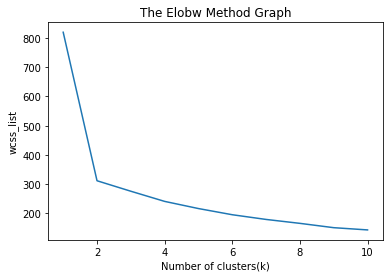

In [ ]:
elbow(p)

#####Silhoutte Visualizer

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [ ]:
# Finding optimal number of clusters using the Silhouette Scores 
# YellowBrick - a machine learning visualization library to draw the silhouette plots and perform comparative analysis.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

def silhoutte(x):
  fig, ax = plt.subplots(5, 2, figsize=(17,12))
  for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', random_state=11)
    cluster_labels = km.fit_predict(x.values)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x.values, cluster_labels)
    print("For n_clusters =", i,
          "The average silhouette_score is :", silhouette_avg)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(x.values)

For n_clusters = 2 The average silhouette_score is : 0.5933363159454307
For n_clusters = 3 The average silhouette_score is : 0.43430897285710035
For n_clusters = 4 The average silhouette_score is : 0.3837970202363447
For n_clusters = 5 The average silhouette_score is : 0.395121757442084
For n_clusters = 6 The average silhouette_score is : 0.40985282805867057
For n_clusters = 7 The average silhouette_score is : 0.420472401226866
For n_clusters = 8 The average silhouette_score is : 0.41702803312850995
For n_clusters = 9 The average silhouette_score is : 0.42892160662844725
For n_clusters = 10 The average silhouette_score is : 0.4366440012458379


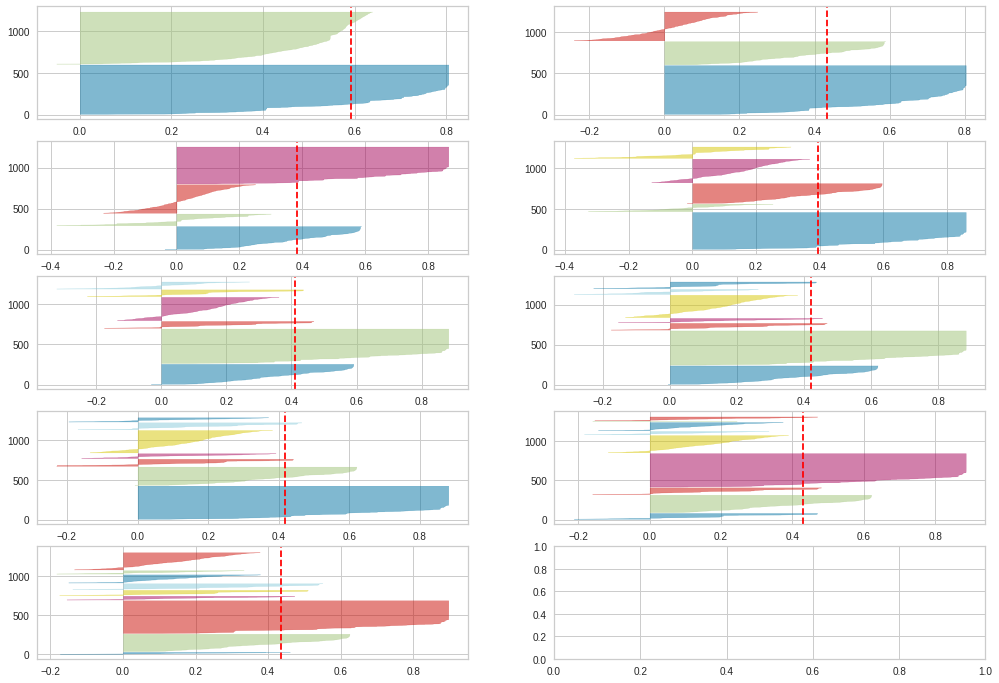

In [ ]:
silhoutte(x)

####Model-  KMeans

K-Means Clustering is an Unsupervised Learning algorithm, which groups the unlabeled dataset into different clusters. Here K defines the number of pre-defined clusters that need to be created in the process, as if K=2, there will be two clusters, and for K=3, there will be three clusters, and so on.

The k-means clustering algorithm mainly performs two tasks:

Determines the best value for K center points or centroids by an iterative process.

Assigns each data point to its closest k-center. Those data points which are near to the particular k-center, create a cluster.

In [ ]:
class Kmeans:
    def __init__(self,data,n_clusters):  
        self.data = data 
        self.n_clusters = n_clusters  
          
    def model(self):  
          kmeans_model = KMeans(n_clusters=self.n_clusters, init='k-means++', random_state= 11) 
          return kmeans_model
   

In [ ]:
c6=Kmeans(x,2)
model=c6.model()

In [ ]:
def kmean(n_clusters):
  kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state= 11) 
  return kmeans

In [ ]:
kmeans=kmean(2)
y_pred=kmeans.fit_predict(x)
y_pred

array([1, 0, 1, ..., 0, 0, 0], dtype=int32)

####Model-Agglomerative clustering

Agglomerative Clustering: Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
class Agglomerative:  
    def __init__(self,name,data,n_clusters):  
        self.name = name
        self.data = data 
        self.n_clusters = n_clusters  
          
    def model(self):  
        if self.name=='ward':
          return  self.model_ward(self.data,self.n_clusters)
        if self.name=='complete':
          return  self.model_complete(self.data,self.n_clusters)
        if self.name=='average':
          return  self.model_average(self.data,self.n_clusters)

    def print_dendo(self,x):
        linkage_type = self.name
        linkage_matrix = linkage(self.data.values, linkage_type)
        plt.figure(figsize=(22,18))
        dendrogram(linkage_matrix)
        plt.show()

    def model_ward(self,data,n_clusters):
        ward = AgglomerativeClustering(n_clusters=n_clusters) 
        return ward

    def model_complete(self,data,n_clusters):
        complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete') 
        return complete

    def model_average(self,data,n_clusters):
        average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average') 
        return average

  

          


In [ ]:
c5=Agglomerative("ward",x,2)
model=c5.model()


#####Dendogram

In [ ]:
# Import scipy's linkage function to conduct the clustering
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

def print_dendo(x,s):
  linkage_type = s

  linkage_matrix = linkage(x.values, linkage_type)


  plt.figure(figsize=(22,18))

  # plot using 'dendrogram()'
  dendrogram(linkage_matrix)

  plt.show()




#####Ward Linkage

For Ward’s linkage, two clusters are merged based on their error sum of square (ESS) values. The two clusters with the lowest ESS are merged. This process repeats until there is only a single cluster left.

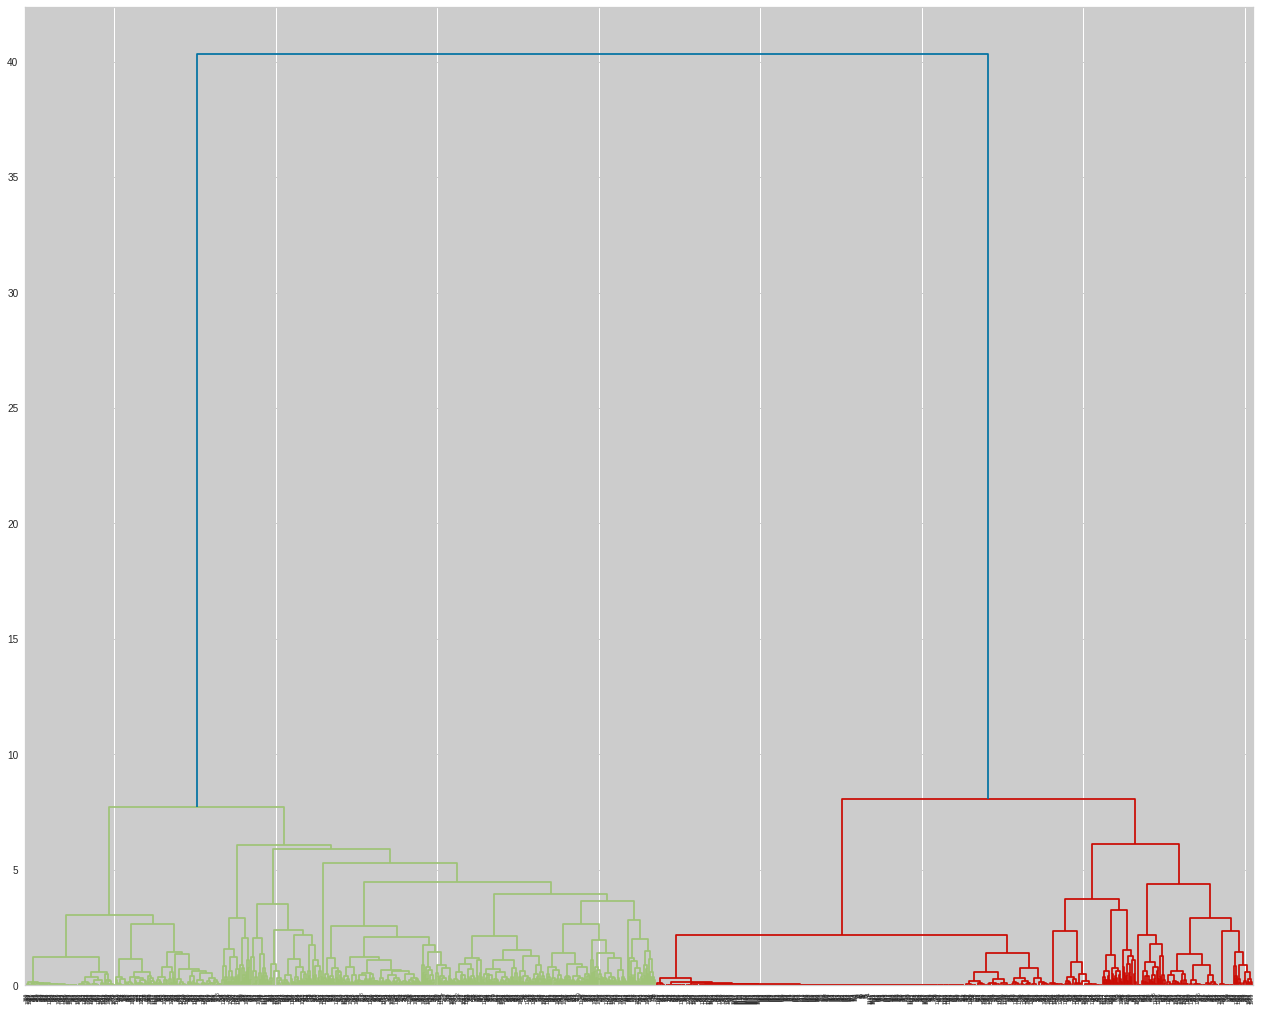

In [ ]:
print_dendo(x,'ward')

In [ ]:
from sklearn.cluster import AgglomerativeClustering
def wardl(n_clusters):
  ward = AgglomerativeClustering(n_clusters=n_clusters) 
  return ward

In [ ]:
ward=wardl(2)
y_predict=ward.fit_predict(x)

In [ ]:
y_predict

array([1, 0, 1, ..., 0, 0, 0])

#####Complete Linkage

For two clusters R and S, the complete linkage returns the maximum distance between two points i and j such that i belongs to R and j belongs to S.

L(R, S) = max(D(i, j))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
def compl(n_clusters):
  complete = AgglomerativeClustering(n_clusters=n_clusters, linkage='complete') 
  return complete

#####Average Linkage

For two clusters R and S, first for the distance between any data-point i in R and any data-point j in S and then the arithmetic mean of these distances are calculated. Average Linkage returns this value of the arithmetic mean.

In [ ]:
from sklearn.cluster import AgglomerativeClustering
def avgl(n_clusters):
  avg = AgglomerativeClustering(n_clusters=n_clusters, linkage='average') 
  return avg

####Model- DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
class DB_SCAN:
    def __init__(self,data,eps,min_samples):  
        self.data = data 
        self.eps=eps
        self.min_samples=min_samples
          
    def model(self):  
          dbscan_model = DBSCAN(eps=self.eps,min_samples=self.min_samples) 
          return dbscan_model
   

In [ ]:
c6=DB_SCAN(x,0.5,5)
model=c6.model()

####Performance Measures

In [ ]:
from abc import ABC, abstractmethod
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_samples, silhouette_score

class Performance(ABC):

  @abstractmethod
  def get_score(self):
        pass

class DBIndex(Performance):
    def __init__(self,data,labels):  
        self.data = data 
        self.labels = labels  
          
    def get_score(self):  
          db_index=davies_bouldin_score(x, labels)
          return db_index.round(3)

class Silscore(Performance):
    def __init__(self,data,labels):  
        self.data = data 
        self.labels = labels  
          
    def get_score(self):  
          return silhouette_score(x,labels).round(3)

class Calharscore(Performance):
    def __init__(self,data,labels):  
        self.data = data 
        self.labels = labels  
          
    def get_score(self):  
          ch_index = calinski_harabasz_score(x, labels)
          return ch_index  

class Adjrandscore(Performance):
    def __init__(self,data,labels,true_labels):  
        self.data = data 
        self.labels = labels 
        self.true_labels = true_labels 
          
    def get_score(self):  
          return adjusted_rand_score(true_labels, labels).round(2)




#####DB-Index

The Davies–Bouldin index (DBI) (introduced by David L. Davies and Donald W. Bouldin in 1979), a metric for evaluating clustering algorithms, is an internal evaluation scheme, where the validation of how well the clustering has been done is made using quantities and features inherent to the dataset. Lower the DB index value, better is the clustering. It also has a drawback. A good value reported by this method does not imply the best information retrieval.

In [ ]:
from sklearn.metrics import davies_bouldin_score

In [ ]:
from sklearn.metrics import davies_bouldin_score
def db(x,labels):
  db_index=davies_bouldin_score(x, labels)
  return db_index

db_index=db(x,kmeans.labels_)
db_index  

In [ ]:
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import calinski_harabasz_score

In [ ]:
from sklearn.metrics import davies_bouldin_score
def db(x,labels):
  db_index=davies_bouldin_score(x, labels)
  return db_index

In [ ]:
db_index=db(x,kmeans.labels_)
db_index

0.6453899191222662

#####Silhaoutte Score

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

In [ ]:
def silscore(x,labels):
  return silhouette_score(x,labels).round(3)


In [ ]:
silvalue=silscore(x,kmeans.labels_)
silvalue

0.593

#####Adjusted rand Index

Rand index adjusted for chance.

The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.

In [ ]:
from sklearn.metrics import adjusted_rand_score
def adj(true_labels,labels):
    return adjusted_rand_score(true_labels, labels).round(2)

#####Calinski- Harabasz Index

Compute the Calinski and Harabasz score.

It is also known as the Variance Ratio Criterion.

The score is defined as ratio of the sum of between-cluster dispersion and of within-cluster dispersion.
The CH Index is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).  

In [ ]:
from sklearn.metrics import calinski_harabasz_score
def calin_hara(x,labels):
  ch_index = calinski_harabasz_score(x, labels)
  return ch_index

In [ ]:
ch_index=calin_hara(x,kmeans.labels_)
ch_index

1993.0778802601171

####Visualisation

In [ ]:
def visualisee(x,labels):
  x=reduced_data(x)
  x['clusters'] = labels
  sns.scatterplot(x="col1", y="col2", hue=x['clusters'], data=x)
  plt.title('K-means Clustering with 2 dimensions')
  plt.show()

In [ ]:
def visualise(x,labels):
  x['clusters'] = labels
  sns.scatterplot(x="pca1", y="pca2", hue=x['clusters'], data=x)
  plt.title('K-means Clustering with 2 dimensions')
  plt.show()

In [ ]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 88 kB 3.8 MB/s 
     |████████████████████████████████| 1.1 MB 7.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=9ab9960269c395f4aa824ee528fe145263bb851711e71fe7a961a7f13b38f1b8
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=484404f5d75e6f74dc38fa48fdafccad96bf8a76eacb80326f37c8c76c59ffb6
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


In [ ]:
import umap
def reduced_data(x):
        reduce_data =umap.UMAP(n_components=2).fit_transform(x)
        results = pd.DataFrame(reduce_data,columns=['col1','col2'])
        return results

In [ ]:
def visualisee(x,labels):
  x=reduced_data(x)
  x['clusters'] = labels
  sns.scatterplot(x="pca1", y="pca2", hue=x['clusters'], data=x)
  plt.title('K-means Clustering with 2 dimensions')
  plt.show()

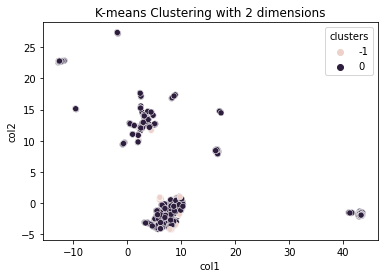

In [ ]:
visualisee(x,y_db)

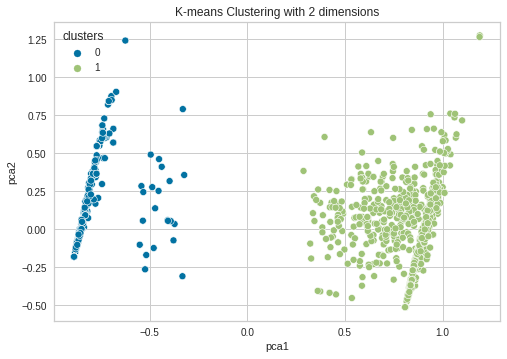

In [ ]:
visualisee(x,kmeans.labels_)

####Clustering All

In [ ]:
from abc import ABC, abstractmethod
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

class Clustering(ABC):

  @abstractmethod
  def get_model(self):
        pass

class Kmeans(Clustering):
    def __init__(self,data,n_clusters):  
        self.data = data 
        self.n_clusters = n_clusters  
          
    def get_model(self):  
          kmeans_model = KMeans(n_clusters=self.n_clusters, init='k-means++', random_state= 11) 
          return kmeans_model

class Agglomerative(Clustering):  
    def __init__(self,name,data,n_clusters):  
        self.name = name
        self.data = data 
        self.n_clusters = n_clusters 
    def get_model(self):  
        agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=self.name)
        return agglo
    def print_dendo(self):
        linkage_type = self.name
        linkage_matrix = linkage(self.data.values, linkage_type)
        plt.figure(figsize=(22,18))
        dendrogram(linkage_matrix)
        plt.show()


class DB_SCAN(Clustering):
    def __init__(self,data,eps,min_samples):  
        self.data = data 
        self.eps=eps
        self.min_samples=min_samples
          
    def get_model(self):  
          dbscan_model = DBSCAN(eps=self.eps,min_samples=self.min_samples) 
          return dbscan_model  

class GMM(Clustering):
    def __init__(self,data,n_clusters):  
        self.data = data 
        self.n_clusters = n_clusters  
          
    def get_model(self):  
          gmm = GaussianMixture(n_components=4) 
          return gmm
            




In [ ]:
x.shape

(1220, 25)

In [ ]:
p=x.copy()

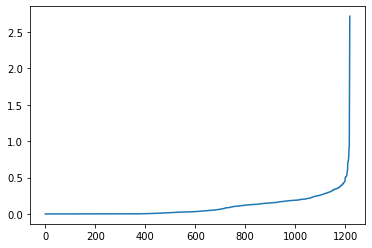

In [ ]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=50)
neighbors_fit = neighbors.fit(p)
distances, indices = neighbors_fit.kneighbors(p)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [ ]:
c7=DB_SCAN(x,0.5,50)
db_model=c7.get_model()
y_db=db_model.fit_predict(x)